In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model

In [7]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [8]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/house/train', 
                                        target_size = (200,200),
                                        batch_size = 3,
                                        class_mode = 'binary')


validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/house/validation',
                                        target_size = (200,200),
                                        batch_size = 3,
                                        class_mode = 'binary')

Found 157 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


In [9]:
model = tf.keras.models.Sequential([
                                    
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(loss = 'binary_crossentropy',
             optimizer= 'adam',
              metrics = ['accuracy']
             )

In [11]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=10,
                      epochs=25,
                      validation_data = validation_dataset

)

Epoch 1/25
10/10 [==============================] - 28s 3s/step - loss: 0.7111 - accuracy: 0.5000 - val_loss: 0.6855 - val_accuracy: 0.6341
Epoch 2/25
10/10 [==============================] - 10s 998ms/step - loss: 0.6968 - accuracy: 0.4000 - val_loss: 0.6908 - val_accuracy: 0.7561
Epoch 3/25
10/10 [==============================] - 8s 749ms/step - loss: 0.6806 - accuracy: 0.6000 - val_loss: 0.6555 - val_accuracy: 0.6341
Epoch 4/25
10/10 [==============================] - 7s 716ms/step - loss: 0.7249 - accuracy: 0.4000 - val_loss: 0.6889 - val_accuracy: 0.6585
Epoch 5/25
10/10 [==============================] - 6s 697ms/step - loss: 0.6898 - accuracy: 0.7667 - val_loss: 0.6905 - val_accuracy: 0.8049
Epoch 6/25
10/10 [==============================] - 5s 507ms/step - loss: 0.6911 - accuracy: 0.6667 - val_loss: 0.6854 - val_accuracy: 0.7805
Epoch 7/25
10/10 [==============================] - 5s 561ms/step - loss: 0.6709 - accuracy: 0.9000 - val_loss: 0.8573 - val_accuracy: 0.3659
Epoch 8

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [13]:
STEP_SIZE_TEST=validation_dataset.n//validation_dataset.batch_size
validation_dataset .reset()
preds = model.predict(validation_dataset,
verbose=1)

14/14 [==============================] - 2s 171ms/step


In [14]:
model.evaluate(validation_dataset)

14/14 [==============================] - 2s 154ms/step - loss: 0.6792 - accuracy: 0.7317


[0.679248571395874, 0.7317073345184326]

In [15]:
model.save('house1.h5')

In [16]:
model1 = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model1.compile(loss='binary_crossentropy',
optimizer=RMSprop(lr=0.001),
metrics='accuracy')

NameError: ignored

In [ ]:
model_fit = model1.fit(train_dataset,
                      steps_per_epoch=10,
                      epochs=25,
                      validation_data = validation_dataset
)

In [ ]:
model1.evaluate(validation_dataset)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
fpr, tpr, _ = roc_curve(validation_dataset.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

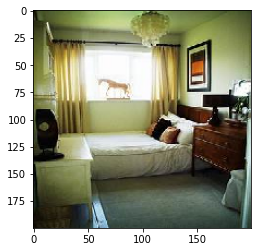

house exterior


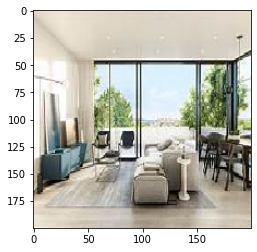

house interior


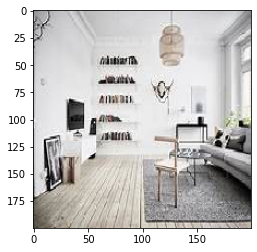

house interior


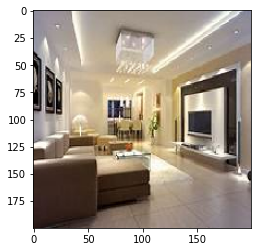

house interior


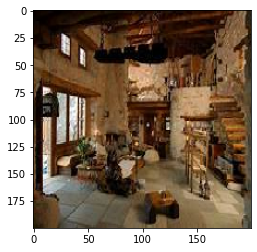

house exterior


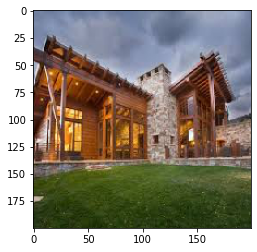

house exterior


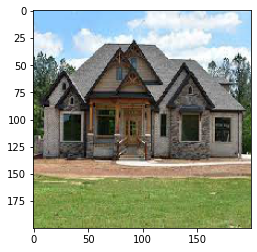

house exterior


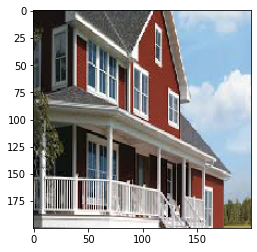

house exterior


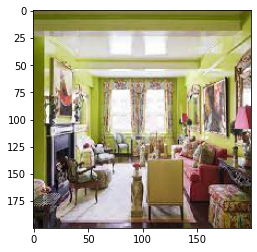

house interior


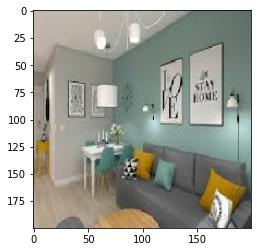

house interior


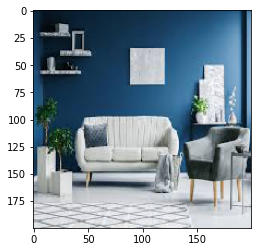

house interior


In [18]:
dir_path='/content/drive/MyDrive/test_h'
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    predict_img = model.predict(images)
    if predict_img == 1:
        print("house interior")  
    else: 
        print("house exterior")

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save('house1.h5')

In [21]:
# dir_path='/content/house1.h5'
# for i in os.listdir(dir_path):
#     img=image.load_img(dir_path+'//'+i,target_size=(200,200))
#     plt.imshow(img)
#     plt.show()
    
#     x = image.img_to_array(img)
#     x = np.expand_dims(x,axis = 0)
#     images = np.vstack([x])
#     predict_img = model.predict(images)
#     if predict_img == 1:
#         print("house interior")  
#     else: 
#         print("house exterior")

In [24]:
# from tensorflow.keras.models import load_model
# model=load_model("house1.h5")
# prediction=model.predict('/content/drive/MyDrive/test_h/images.jpg')
# best_pred=np.argmax(prediction)

In [28]:
# model.load_weights('model.h5') 